In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bisect
import seaborn as sns
import LCDMSphere
import Energy_loss_class
import IGM

r0 = 2.818e-13 # classical electron radius in cm
m_e = 9.10938e-28 # electron mass in gram
c = 2.998e10 # speed of light in cm/s
h = 6.6261e-27 # planck constant in cm^2 g s-1
k = 1.3808e-16 # boltzmann constant in cm^2 g s^-2 K^-1
T_CMB = 2.725 # CMB temperature today in K

H_0 = 2.184e-18 # current hubble constant in s^-1
H_r = 3.24076e-18 # 100 km/s/Mpc to 1/s
h_0 = H_0 / H_r
omega_b_0 = 0.0224 / h_0 / h_0  # current baryon abundance
m_p = 1.67262193269e-24 # proton mass in g
G = 6.6743e-8 # gravitational constant in cm^3 g^-1 s^-2
f_He = 0.079 # helium mass fraction
f_H = 0.76 # hydrogen fraction
Y_He = 0.24

E_e = m_e * c * c
rho_crit = 3 * H_0 * H_0 / 8 / np.pi / G

nstep = 399 # redshift grid
mstep = 399 # energy grid

In [2]:
IGM_00 = IGM.IGM_N(0,0)

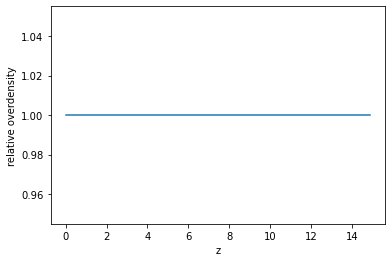

In [10]:
plt.plot(IGM_00.z, IGM_00.Delta)
plt.xlabel('z')
plt.ylabel('relative overdensity')
plt.show()

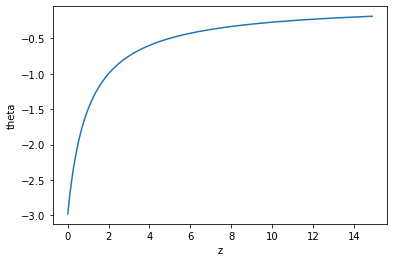

In [11]:
plt.plot(IGM_00.z, IGM_00.theta)
plt.xlabel('z')
plt.ylabel('theta')
plt.show()

In [3]:
co2 = np.zeros((mstep, nstep))
for i in range(mstep):
    for j in range(nstep):
        co2[i][j] = IGM_00.theta[j] / 3 * IGM.E[i] * (IGM.E[i] + 2 * IGM.E_e) / (IGM.E[i] + IGM.E_e)

In [4]:
S = np.loadtxt("source_term_Khaire.txt") # in 'same columns, same redshift; same row, same energy' format 
S = np.delete(S, 0, axis=1)

In [7]:
print(np.where(S[0]==max(S[0])))
print(IGM_00.z[213])

(array([213]),)
2.629215764491318


In [22]:
print(np.where(IGM_00.z>=14))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


In [23]:
print(IGM_00.z[8]-14, IGM_00.z[9]-14)

0.08241634390944341 -0.022025717080399687


In [5]:
idx_zmax = 213
idx_z0 = -1
idx_z1 = 299
idx_z2 = 240
idx_z3 = 199
idx_z4 = 167
idx_z5 = 141
idx_z6 = 118
idx_z7 = 99
idx_z8 = 82
idx_z9 = 67
idx_z10 = 53
idx_z11 = 41
idx_z12 = 29
idx_z13 = 19
idx_z14 = 9
idx_z15 = 0

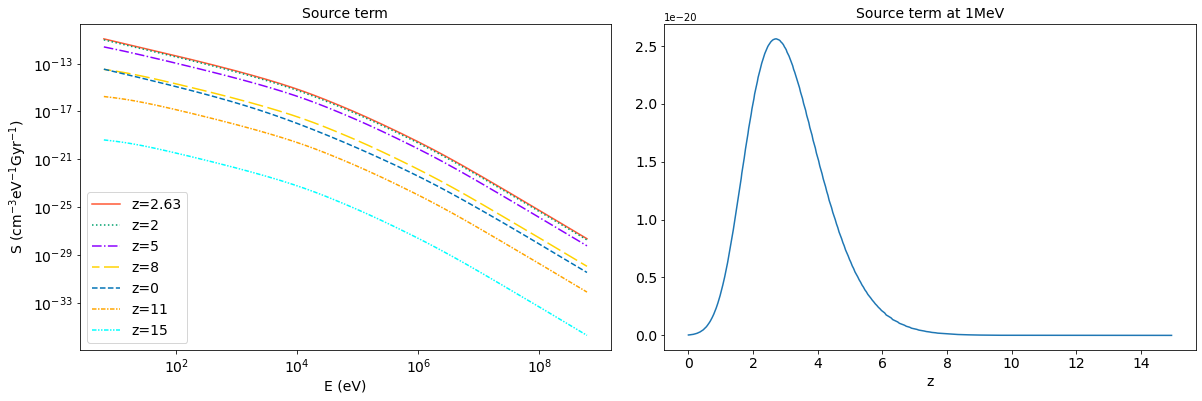

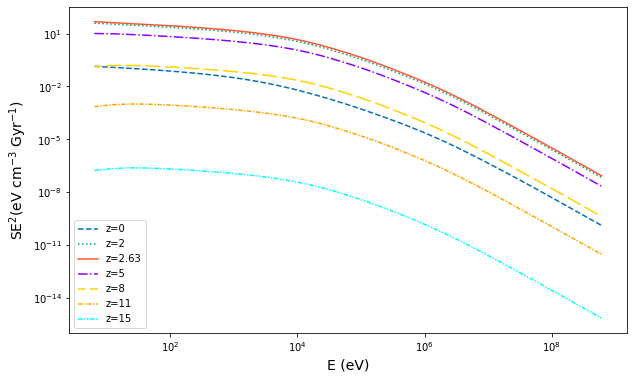

In [17]:
S_trans = np.transpose(S)

SE2 = [S_trans[i]*3.15576e16*1.602e-12 * IGM.E_mid/1.602e-12**2 for i in range(len(IGM.E_mid))]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# 0, 15, max, 2, 5, 8, 11
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_zmax]*3.15576e16*1.602e-12, '-', color = "#FF5733", label='z=2.63')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z2]*3.15576e16*1.602e-12, ':', color = "#00A16D", label='z=2')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z5]*3.15576e16*1.602e-12, '-.', color = "#8B00FF", label='z=5')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z8]*3.15576e16*1.602e-12, color = "#FFD300", linestyle=(5, (10, 3)), label='z=8')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z0]*3.15576e16*1.602e-12, '--', color = "#0072B5", label='z=0')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z11]*3.15576e16*1.602e-12, color = "#FFA500", linestyle=(0, (3, 1, 1, 1)), label='z=11')
ax[0].plot(IGM.E_mid/1.602e-12, S_trans[idx_z15]*3.15576e16*1.602e-12, color = "#00FFFF", linestyle=(0, (3, 1, 1, 1, 1, 1)), label='z=15')

ax[0].set_xlabel('E (eV)', fontsize=14)
ax[0].set_xscale('log')
ax[0].set_ylabel('S ($\mathrm{cm^{-3} eV^{-1} Gyr^{-1}}$)', fontsize=14)
ax[0].set_yscale('log')
ax[0].legend(loc='lower left', fontsize=14)
ax[0].set_title('Source term', fontsize=14)

ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(IGM_00.z, S[260]*3.15576e16*1.602e-12)
ax[1].set_xlabel('z', fontsize=14)
ax[1].set_title('Source term at 1MeV', fontsize=14)

ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.subplots_adjust(wspace=0.1)
plt.savefig('source.pdf')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z0], '--', color = "#0072B5", label='z=0')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z2], ':', color = "#00A16D", label='z=2')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_zmax], '-', color = "#FF5733", label='z=2.63')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z5], '-.', color = "#8B00FF", label='z=5')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z8], color = "#FFD300", linestyle=(5, (10, 3)), label='z=8')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z11], color = "#FFA500", linestyle=(0, (3, 1, 1, 1)), label='z=11')
plt.plot(IGM.E_mid/1.602e-12, SE2[idx_z15], color = "#00FFFF", linestyle=(0, (3, 1, 1, 1, 1, 1)), label='z=15')

plt.xlabel('E (eV)', fontsize=14)
plt.ylabel('S$\mathrm{E^2 (eV\ cm^{-3}\ Gyr^{-1}})$', fontsize=14)
plt.legend(loc = 'lower left')
plt.xscale('log')
plt.yscale('log')
plt.show()

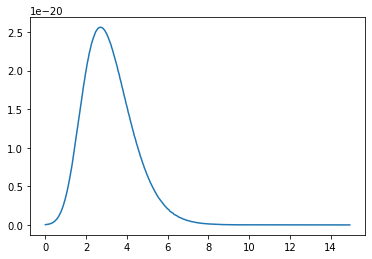

In [62]:
plt.plot(IGM_00.z, S[260]*3.15576e16*1.602e-12)

In [18]:
loss = np.zeros((IGM.nstep, IGM.mstep))
loss_inv_compton = np.zeros((IGM.nstep, IGM.mstep))
loss_coll_free = np.zeros((IGM.nstep, IGM.mstep))

for i in range(IGM.nstep):
    for j in range(IGM.mstep):
        Loss = Energy_loss_class.Loss(IGM_00.z[j], IGM.E[i], IGM_00.Delta[j])
        loss_inv_compton[i][j] = Loss.E_loss_inv_Compton() # energy loss due to inverse Compton
        loss_coll_free[i][j] = Loss.E_loss_coll_free() # energy loss due to collision
        loss[i][j] = loss_inv_compton[i][j] + loss_coll_free[i][j]

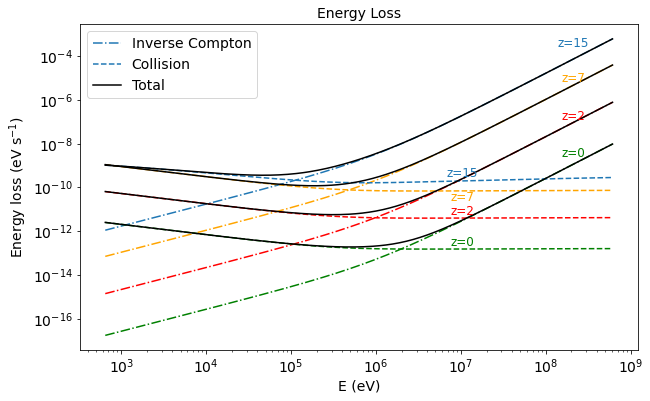

In [24]:
loss_inv_E = np.transpose(loss_inv_compton)
loss_coll_E = np.transpose(loss_coll_free)
X = IGM.E_mid[100:]/1.602e-12
IC15 = -loss_inv_E[0]/1.602e-12
IC7 = -loss_inv_E[idx_z7]/1.602e-12
IC2 = -loss_inv_E[idx_z2]/1.602e-12
IC0 = -loss_inv_E[-1]/1.602e-12

C15 = -loss_coll_E[0]/1.602e-12
C7 = -loss_coll_E[idx_z7]/1.602e-12
C2 = -loss_coll_E[idx_z2]/1.602e-12
C0 = -loss_coll_E[-1]/1.602e-12

Tot15 = IC15+C15
Tot7 = IC7+C7
Tot2 = IC2+C2
Tot0 = IC0+C0

plt.figure(figsize=(10,6))
plt.plot(X, IC15[100:], '-.', color='#1f77b4', label='Inverse Compton')
plt.plot(X, IC7[100:], '-.', color='orange')
plt.plot(X, IC2[100:], '-.', color='red')
plt.plot(X, IC0[100:], '-.', color='green')

plt.plot(X, C15[100:], '--', color='#1f77b4', label='Collision')
plt.plot(X, C7[100:], '--', color='orange')
plt.plot(X, C2[100:], '--', color='red')
plt.plot(X, C0[100:], '--', color='green')

plt.plot(X, Tot15[100:], '-', color='black', label='Total')
plt.plot(X, Tot7[100:], '-', color='black')
plt.plot(X, Tot2[100:], '-', color='black')
plt.plot(X, Tot0[100:], '-', color='black')

plt.text(X[275], IC15[385], 'z=15', ha='center', va='bottom', fontsize=12, color='#1f77b4')
plt.text(X[275], IC7[375], 'z=7', ha='center', va='bottom', fontsize=12, color='orange')
plt.text(X[275], IC2[375], 'z=2', ha='center', va='bottom', fontsize=12, color='red')
plt.text(X[275], IC0[380], 'z=0', ha='center', va='bottom', fontsize=12, color='green')

plt.text(X[210], C15[330], 'z=15', ha='center', va='bottom', fontsize=12, color='#1f77b4')
plt.text(X[210], IC0[330], 'z=7', ha='center', va='bottom', fontsize=12, color='orange')
plt.text(X[210], C2[320], 'z=2', ha='center', va='bottom', fontsize=12, color='red')
plt.text(X[210], C0[330], 'z=0', ha='center', va='bottom', fontsize=12, color='green')

plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Energy Loss', fontsize = 14)
plt.legend(loc='upper left', fontsize=14)

#plt.xlim([1e2, 1e8])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.subplots_adjust(left=0.15)
plt.savefig('loss.pdf')
plt.show()

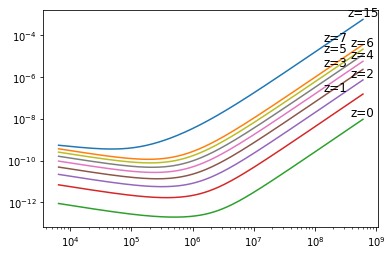

In [17]:
Tot15 = IC15 + C15
Tot7 = IC7 + C7
Tot0 = IC0 + C0
Tot1 = -loss_inv_E[148]/1.602e-12 -loss_coll_E[148]/1.602e-12
Tot2 = -loss_inv_E[120]/1.602e-12 -loss_coll_E[120]/1.602e-12
Tot3 = -loss_inv_E[99]/1.602e-12 -loss_coll_E[99]/1.602e-12
Tot4 = -loss_inv_E[83]/1.602e-12 -loss_coll_E[83]/1.602e-12
Tot5 = -loss_inv_E[70]/1.602e-12 -loss_coll_E[70]/1.602e-12
Tot6 = -loss_inv_E[59]/1.602e-12 -loss_coll_E[59]/1.602e-12

plt.plot(X, Tot15)
plt.plot(X, Tot7)
plt.plot(X, Tot0)
plt.plot(X, Tot1)
plt.plot(X, Tot2)
plt.plot(X, Tot3)
plt.plot(X, Tot4)
plt.plot(X, Tot5)
plt.plot(X, Tot6)

plt.text(X[-1], Tot15[-1], 'z=15', ha='center', va='bottom', fontsize=12)
plt.text(X[180], Tot7[-1], 'z=7', ha='center', va='bottom', fontsize=12)
plt.text(X[-1], Tot0[-1], 'z=0', ha='center', va='bottom', fontsize=12)
plt.text(X[180], Tot1[-1], 'z=1', ha='center', va='bottom', fontsize=12)
plt.text(X[-1], Tot2[-1], 'z=2', ha='center', va='bottom', fontsize=12)
plt.text(X[180], Tot3[-1], 'z=3', ha='center', va='bottom', fontsize=12)
plt.text(X[-1], Tot4[-1], 'z=4', ha='center', va='bottom', fontsize=12)
plt.text(X[180], Tot5[-1], 'z=5', ha='center', va='bottom', fontsize=12)
plt.text(X[-1], Tot6[-1], 'z=6', ha='center', va='bottom', fontsize=12)

plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
print(IGM_00.z[0])

14.88931202339767


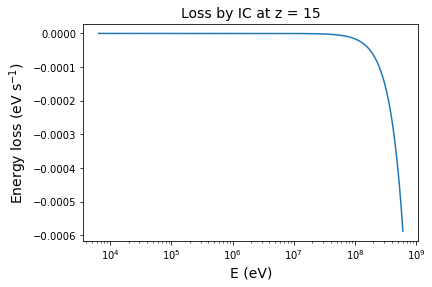

In [36]:
loss_inv_E = np.transpose(loss_inv_compton)
plt.plot(IGM.E_mid/1.602e-12, loss_inv_E[0]/1.602e-12)
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by IC at z = 15', fontsize = 14)
plt.savefig('IC15.pdf')
plt.show()

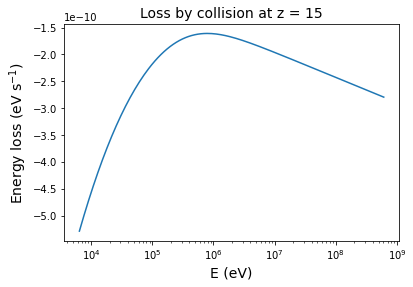

In [37]:
loss_coll_E = np.transpose(loss_coll_free)
plt.plot(IGM.E_mid/1.602e-12, loss_coll_E[0]/1.602e-12)
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by collision at z = 15', fontsize = 14)
plt.savefig('CF15.pdf')
plt.show()

In [26]:
print(IGM_00.z[50])

6.9170317076639805


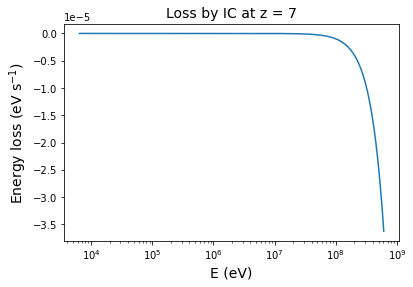

In [38]:
plt.plot(IGM.E_mid/1.602e-12, loss_inv_E[50]/1.602e-12)
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by IC at z = 7', fontsize = 14)
plt.savefig('IC7.pdf')
plt.show()

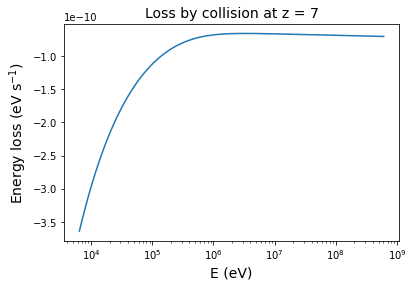

In [39]:
loss_coll_E = np.transpose(loss_coll_free)
plt.plot(IGM.E_mid/1.602e-12, loss_coll_E[50]/1.602e-12) # H fully ionized
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by collision at z = 7', fontsize = 14)
plt.savefig('CF7.pdf')
plt.show()

In [28]:
print(IGM_00.z[198])

0.007015058871677082


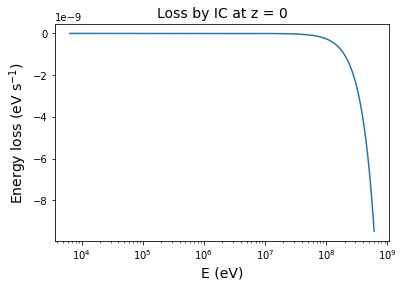

In [41]:
plt.plot(IGM.E_mid/1.602e-12, loss_inv_E[198]/1.602e-12)
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by IC at z = 0', fontsize = 14)
plt.savefig('IC0.pdf')
plt.show()

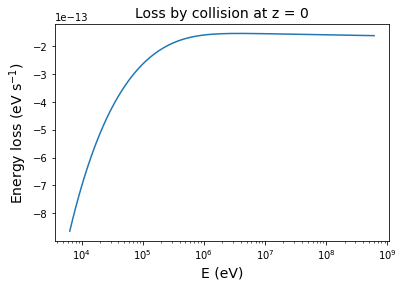

In [42]:
loss_coll_E = np.transpose(loss_coll_free)
plt.plot(IGM.E_mid/1.602e-12, loss_coll_E[198]/1.602e-12) # He fully ionized
plt.xlabel('E (eV)', fontsize = 14)
plt.xscale('log')
plt.ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
plt.title('Loss by collision at z = 0', fontsize = 14)
plt.savefig('CF0.pdf')
plt.show()

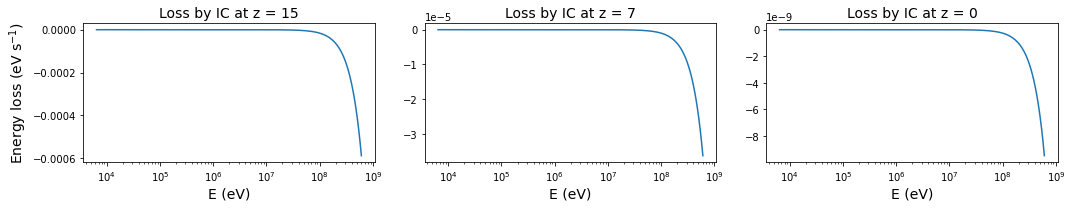

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Plot the first subplot
axes[0].plot(IGM.E_mid/1.602e-12, loss_inv_E[0]/1.602e-12)
axes[0].set_title('Loss by IC at z = 15', fontsize = 14)
axes[0].set_xlabel('E (eV)', fontsize = 14)
axes[0].set_ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)
axes[0].set_xscale('log')

# Plot the second subplot
axes[1].plot(IGM.E_mid/1.602e-12, loss_inv_E[50]/1.602e-12)
axes[1].set_title('Loss by IC at z = 7', fontsize = 14)
axes[1].set_xlabel('E (eV)', fontsize = 14)
axes[1].set_xscale('log')

# Plot the third subplot
axes[2].plot(IGM.E_mid/1.602e-12, loss_inv_E[198]/1.602e-12)
axes[2].set_title('Loss by IC at z = 0', fontsize = 14)
axes[2].set_xlabel('E (eV)', fontsize = 14)
axes[2].set_xscale('log')

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('IC.png')
plt.show()

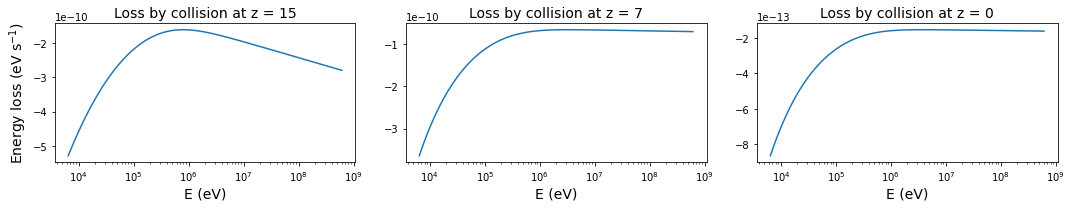

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Plot the first subplot
axes[0].plot(IGM.E_mid/1.602e-12, loss_coll_E[0]/1.602e-12)
axes[0].set_title('Loss by collision at z = 0', fontsize = 14)
axes[0].set_xlabel('E (eV)', fontsize = 14)
axes[0].set_xscale('log')
axes[0].set_ylabel('Energy loss (eV $\mathrm{s^{-1}}$)', fontsize = 14)

# Plot the second subplot
axes[1].plot(IGM.E_mid/1.602e-12, loss_coll_E[50]/1.602e-12)
axes[1].set_title('Loss by collision at z = 7', fontsize = 14)
axes[1].set_xlabel('E (eV)', fontsize = 14)
axes[1].set_xscale('log')

# Plot the third subplot
axes[2].plot(IGM.E_mid/1.602e-12, loss_coll_E[198]/1.602e-12)
axes[2].set_title('Loss by collision at z = 0', fontsize = 14)
axes[2].set_xlabel('E (eV)', fontsize = 14)
axes[2].set_xscale('log')

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('CF.png')
plt.show()